# Spandan Ghevriya

## Research question/interests
Is there a positive corrrelation between an individual's age and the medical costs billed by health insurance?
H0:There is no significant positive correlation between an individual's age and the medical costs billed by health insurance.
H1:There is a significant positive correlation between an individual's age and the medical costs billed by health insurance.

Is there a significant difference of medical costs billed between a smoker and a non-smoker?
H0:There is no significant difference of medical costs billed between a smoker and a non-smoker.
H1:There is a significant difference of medical costs billed between a smoker and a non-smoker.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import project_functions3 as p3
import statistics

In [ ]:
print(f'This is the original set of data. To answer our research question, we only need information regarding age, if the individual smokes or not, and their total bills.\n')
dfMain = pd.read_csv("../data/raw/raw_MC.csv")
display(dfMain)

This is the original set of data. To answer our research question, we only need information regarding age, if the individual smokes or not, and their total bills.



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(f'The data set is then modified to only include the relevant information needed for the analysis.\nThe values of "Total Charges" was rounded to the nearest whole number.\nDuplicate values have been dropped from the dataset.\nThe variable "Smoker" has been changed from an object to a category to categorize the "no" and "yes" values.\n')
df = p3.load_and_process("../data/raw/raw_MC.csv")
display(df)

The data set is then modified to only include the relevant information needed for the analysis.
The values of "Total Charges" was rounded to the nearest whole number.
Duplicate values have been dropped from the dataset.
The variable "Smoker" has been changed from an object to a category to categorize the "no" and "yes" values.



,Age,Smoker,Total_Charges
0,19,yes,16884.92
1,18,no,1725.55
2,28,no,4449.46
3,33,no,21984.47
4,32,no,3866.86
...,...,...,...
1333,50,no,10600.55
1334,18,no,2205.98
1335,18,no,1629.83
1336,21,no,2007.94


In [ ]:
# generate preview of entries with null values
p3.null(df)

There are no null values in this dataset


In [ ]:
p3.describe(df)

The age of the people in this dataset range from 18 to 64 with a mean of 39.2.
Total charges for these people range from $1121.87 to $63770.43 with a mean of $13279.12.
There are a total of 274 smokers and 1063 non-smokers in this dataset.


A KDE plot presents the continuous probability density curve of total medical insurance bills.
This data is positively skewed, and it shows that majority of the people pay costs less than $20,000.
Factors such as their age and if they smoke may affect their costs. This will be explored through further analysis and interpretation.


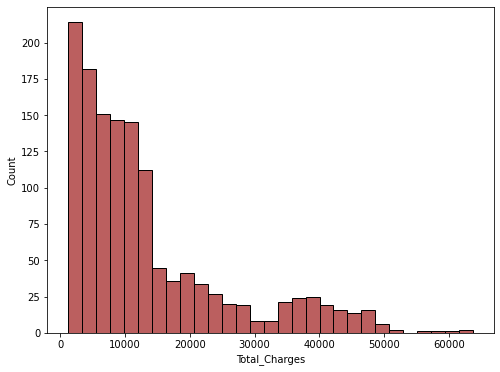

In [ ]:
print(f'A KDE plot presents the continuous probability density curve of total medical insurance bills.\nThis data is positively skewed, and it shows that majority of the people pay costs less than $20,000.\nFactors such as their age and if they smoke may affect their costs. This will be explored through further analysis and interpretation.')
plt.figure(figsize=(8,6))
hist = sns.histplot(data=df, x="Total_Charges", color = "brown")

I am graphing a correlation matrix to gain general understanding of all of my numeric variables. 
All of the variables have a correlation in the positive direction.



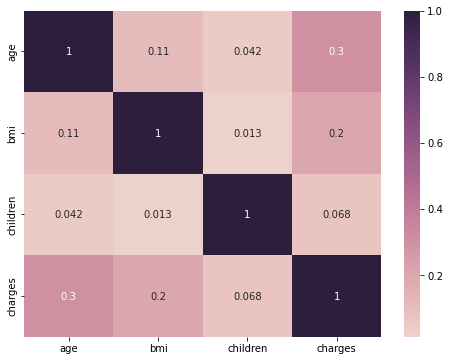

In [ ]:
print(f'I am graphing a correlation matrix to gain general understanding of all of my numeric variables. \nAll of the variables have a correlation in the positive direction.\n')
plt.figure(figsize=(8,6))
corrMix = dfMain.corr()
corrMix = sns.heatmap(corrMix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
dfOut = p3.removeOutliers(df)
print(f'There were 7 outliers for the variable "Total Charges" in the original dataset that have now been removed.\n')
display(dfOut)

There were 7 outliers for the variable "Total Charges" in the original dataset that have now been removed.



,Age,Smoker,Total_Charges
0,19,yes,16884.92
1,18,no,1725.55
2,28,no,4449.46
3,33,no,21984.47
4,32,no,3866.86
...,...,...,...
1325,50,no,10600.55
1326,18,no,2205.98
1327,18,no,1629.83
1328,21,no,2007.94


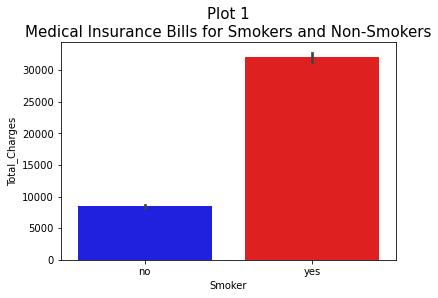

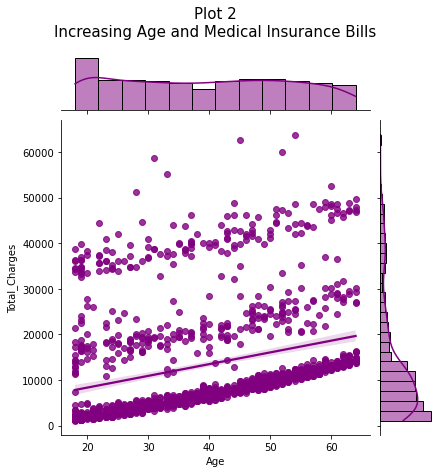

In [ ]:
plot1 = sns.barplot(data=df, x="Smoker", y="Total_Charges", errorbar=("se"), palette = ['blue','red'])
plot1 = plt.title('Plot 1\nMedical Insurance Bills for Smokers and Non-Smokers', fontsize = 15)

plot2 = sns.jointplot(x='Age', y='Total_Charges', data = df, kind='reg', color = "purple")
plot2 = plt.title("Plot 2\nIncreasing Age and Medical Insurance Bills", fontsize = 15, y = 1.25)


# Summary

#### Research Question 1: Is there a significant difference of medical costs billed between a smoker and a non-smoker?

H0:There is no significant difference of medical costs billed between a smoker and a non-smoker.

H1:There is a significant difference of medical costs billed between a smoker and a non-smoker.

Through the observations made in Plot 1, it can be seen that there is a noticeably higher amount of medical insurance charges associated with smokers compared to non-smokers. Because the error bars do not overlap, one can say that there is a significant difference for the total medical costs of an individual between a smoker and a non-smoker. To understand if the data is statistically significant, an independent samples t-test has to be done by studying the hypotheses stated above.  

****

#### Research Question 2: Is there a positive corrrelation between an individual's age and the medical costs billed by health insurance?

H0:There is no significant positive correlation between an individual's age and the medical costs billed by health insurance.

H1:There is a significant positive correlation between an individual's age and the medical costs billed by health insurance.

The scatterplot illustrate a positive linear correlation between an individual's age and the medical costs billed by health insurance. In other words, medical insurance costs are higher with increasing age. To find a effect size of this correlation, a Pearson's correlation test has to be done to study the hypotheses stated above. 

